## Observations and Insights 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
len(merged_df["Mouse ID"])

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

get_duplicates = merged_df.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name = 'count')
get_duplicates[get_duplicates["count"]>1]


,Mouse ID,Timepoint,count
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_df[merged_df["Mouse ID"] == "g989"]
len(duplicate_mouse)

13

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_duplicate = merged_df[merged_df["Mouse ID"] != "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
len(remove_duplicate)

1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summarystatistics = remove_duplicate.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summarystatistics.style.format('{:.2f}')

## Bar and Pie Charts

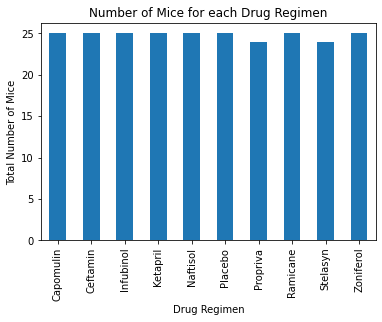

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
totalmice = remove_duplicate.groupby("Drug Regimen")["Mouse ID"].nunique()
totalmice.plot(kind ='bar')
plt.title('Number of Mice for each Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.show()

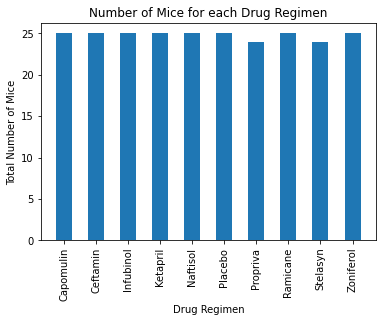

In [110]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#plt.bar(totalmice)
plt.bar(range(len(totalmice)), totalmice, tick_label = totalmice.index, width = 0.5)
plt.xticks(rotation="vertical")
plt.title('Number of Mice for each Drug Regimen')
plt.title('Number of Mice for each Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.xlabel('Drug Regimen')
#plt.bar('Drug Regimen', 'Mouse ID', data = remove_duplicate)
plt.show()

Text(0.5, 1.0, 'Number of Mice for each Drug Regimen')

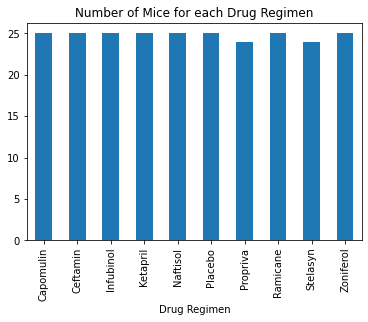

In [12]:
remove_duplicate.groupby("Drug Regimen")["Mouse ID"].nunique().plot(kind = 'bar')
plt.title('Number of Mice for each Drug Regimen')

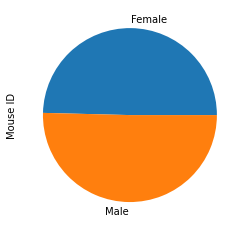

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexmice = remove_duplicate.groupby("Sex")["Mouse ID"].nunique()
sexmice.plot.pie()
plt.title('Distribution of female and male mice')
plt.show()

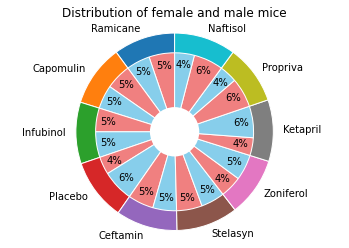

In [198]:

sexperregimen = remove_duplicate.groupby(["Drug Regimen","Sex"])["Mouse ID"].nunique()

plt.pie(totalmice, startangle = 90, pctdistance = 0.88, radius = 1, wedgeprops = {'linewidth': 1, 'edgecolor': "w"}, labels=treatments)
sexcolours = ["lightcoral", "skyblue"]
plt.pie(sexperregimen, startangle = 90, pctdistance = 0.85, radius = 0.8, colors = sexcolours,wedgeprops = {'linewidth': 1, 'edgecolor': "w"}, autopct='%.f%%')
centre = plt.Circle((0,0), 0.25, fc = 'w')
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.title('Distribution of female and male mice')
plt.axis('equal')
plt.show()



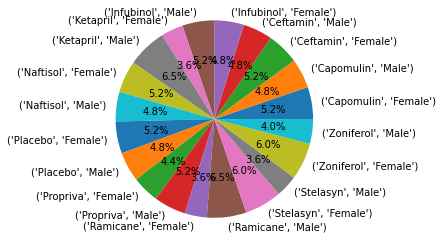

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sexmice.index
sizes = sexmice.values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct='%.1f%%')
ax1.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtime = remove_duplicate.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedtime = pd.merge(maxtime, remove_duplicate, on = ["Mouse ID", "Timepoint"])
mergedtime[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', "Timepoint"]]

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
2,a262,Placebo,70.717621,45
3,a275,Ceftamin,62.999356,45
4,a366,Stelasyn,63.440686,30
...,...,...,...,...
243,z435,Propriva,48.710661,10
244,z578,Ramicane,30.638696,45
245,z581,Infubinol,62.754451,45
246,z795,Naftisol,65.741070,45


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = remove_duplicate['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
ranges = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    subset = mergedtime[mergedtime['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([0.25,0.5,0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower
    lowerbound = lower - (1.5 * iqr)
    upperbound = upper + (1.5 * iqr)
    ranges[drug] = [lowerbound,upperbound]
ranges

{'Ramicane': [17.912664470000003, 54.30681135],
 'Capomulin': [20.70456164999999, 51.83201549],
 'Infubinol': [36.83290494999999, 82.74144559000001],
 'Placebo': [30.15582196999999, 90.92136789000001],
 'Ceftamin': [25.355449580000002, 87.66645829999999],
 'Stelasyn': [27.53557243999998, 94.04496758000002],
 'Zoniferol': [24.77952216500001, 92.00293628499998],
 'Ketapril': [36.99186244000001, 89.60048379999998],
 'Propriva': [28.76529576625, 83.04381145625001],
 'Naftisol': [25.85334408499999, 95.78978676500002]}

In [26]:
outliers = {}
for drug in treatments:
    outlier = (finaltumor_series[drug] > ranges[drug][1]).sum() + (finaltumor_series[drug] < ranges[drug][0]).sum()
    outliers[drug] = outlier
    
outliers

{'Ramicane': 0,
 'Capomulin': 0,
 'Infubinol': 1,
 'Placebo': 0,
 'Ceftamin': 0,
 'Stelasyn': 0,
 'Zoniferol': 0,
 'Ketapril': 0,
 'Propriva': 0,
 'Naftisol': 0}

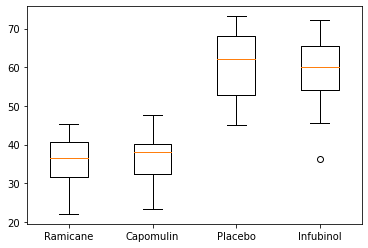

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finaltumor_series = pd.Series(tumor_vol, index = treatments)
fig1, ax1 = plt.subplots()
ax1.boxplot(finaltumor_series[["Ramicane", "Capomulin","Placebo","Infubinol"]])
ax1.set_xticklabels(finaltumor_series[["Ramicane", "Capomulin","Placebo","Infubinol"]].index)
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

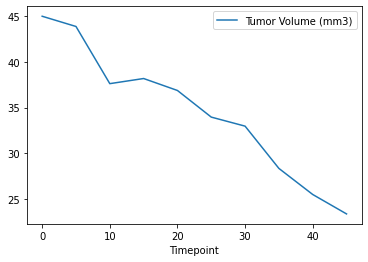

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = remove_duplicate[remove_duplicate["Drug Regimen"]=="Capomulin"][["Mouse ID", "Timepoint","Tumor Volume (mm3)", 'Weight (g)']]
Capomulin[Capomulin["Mouse ID"] == "s185"].plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)')


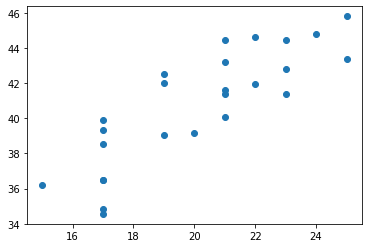

In [104]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#CapTumorMean = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)','Weight (g)'].mean()
x = Capomulin.groupby('Mouse ID')['Weight (g)'].mean()
y = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#CapTumorMean.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)')
plt.scatter(x,y)


## Correlation and Regression

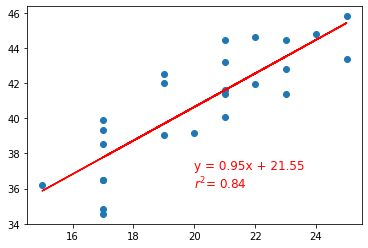

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x*slope + intercept
line = f"y = {slope:.2f}x + {intercept:.2f}\n$r^{2}$= {rvalue:.2f}" 
plt.scatter(x,y)
plt.plot(x, regression, "r-")
plt.annotate(line, (20,36), fontsize = 12, color = "red")
plt.show()


In [58]:
remove_duplicate.groupby("Drug Regimen").agg({"Weight (g)":["mean","median","var","std","sem"]})

Weight (g)                                      
                   mean median        var       std       sem
Drug Regimen                                                 
Capomulin     19.965217   20.5   7.466034  2.732404  0.180169
Ceftamin      27.398876   28.0   2.501016  1.581460  0.118535
Infubinol     27.196629   27.0   4.769028  2.183810  0.163684
Ketapril      27.861702   28.0   3.392536  1.841884  0.134333
Naftisol      27.166667   27.0   2.247748  1.499249  0.109930
Placebo       27.928177   28.0   3.378146  1.837973  0.136615
Propriva      27.135135   26.0   2.933995  1.712891  0.140799
Ramicane      19.679825   19.0  10.465318  3.235014  0.214244
Stelasyn      27.856354   28.0   2.701473  1.643616  0.122169
Zoniferol     27.692308   28.0   2.015300  1.419612  0.105229

<ipython-input-102-dc1515e50f14>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  af = remove_duplicate.groupby(['Drug Regimen','Mouse ID'])['Weight (g)', 'Tumor Volume (mm3)'].mean().reset_index()


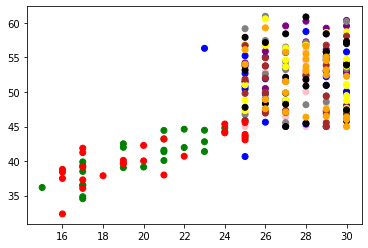

In [102]:
# a = remove_duplicate.groupby(['Drug Regimen','Mouse ID'])['Weight (g)'].mean()
# b = remove_duplicate.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].mean()
#frame = {'Weight (g)':a, 'Tumor Volume (mm3)':b, }

af = remove_duplicate.groupby(['Drug Regimen','Mouse ID'])['Weight (g)', 'Tumor Volume (mm3)'].mean().reset_index()

colours = dict(zip(treatments,["red","green","blue","yellow","pink","black","orange","purple","brown","gray"]))
plt.scatter(af['Weight (g)'],af['Tumor Volume (mm3)'], c=af['Drug Regimen'].map(colours))


<ipython-input-88-6d7e1088a331>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,2,i)


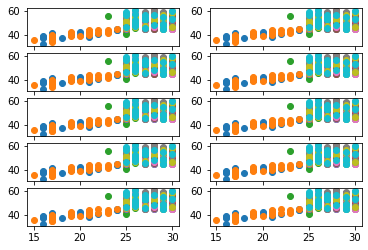

In [88]:
#fig,a = plt.subplots(5,2)
for drug in treatments:
    for i in range(1,len(treatments)+1):
        toplot = remove_duplicate[remove_duplicate["Drug Regimen"]==drug][["Mouse ID","Tumor Volume (mm3)", 'Weight (g)']]
        a = toplot.groupby('Mouse ID')['Weight (g)'].mean()
        b = toplot.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
        plt.subplot(5,2,i)
        plt.scatter(a,b)
plt.show()

In [ ]:
plt.subplot(2,2,1)
plt.scatter()